In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("input/train_indessa.csv")

In [3]:
print("Shape: ", data.shape)
data[:5]

Shape:  (532428, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
# Columns unique values
for col in data:
    print(col, ": ", data[col].unique())

member_id :  [58189336 70011223 70255675 ...,  7357607 23182668 46122259]
loan_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt_inv :  [ 14350.           4800.          10000.         ...,   4687.79228349
  17901.7719906    8283.54      ]
term :  ['36 months' '60 months']
batch_enrolled :  [' ' 'BAT1586599' 'BAT4808022' 'BAT2833642' 'BAT2575549' nan 'BAT4136152'
 'BAT4694572' 'BAT5924421' 'BAT3193689' 'BAT224923' 'BAT1184694'
 'BAT1930365' 'BAT3873588' 'BAT2252229' 'BAT1135695' 'BAT4271519'
 'BAT3726927' 'BAT2803411' 'BAT1104812' 'BAT5341619' 'BAT3865626'
 'BAT1780517' 'BAT2522922' 'BAT2558388' 'BAT2428731' 'BAT3943761'
 'BAT2333412' 'BAT5849876' 'BAT5540558' 'BAT2136391' 'BAT1761981'
 'BAT47674' 'BAT1327206' 'BAT1467036' 'BAT2003848' 'BAT4722912'
 'BAT4201183' 'BAT5525466' 'BAT5489674' 'BAT2078974' 'BAT4351734'
 'BAT2677031' 'BAT3461431' 'BAT3292317' 'BAT1766061' 'BAT1914408'
 'BAT1942645' 'BAT5458862' 'BAT2015867

## Preprocessing

In [5]:
data = data.fillna("0")

In [6]:
data['last_week_pay'] = data['last_week_pay'].str.extract('(\d+)', expand=False)
data = data.fillna("0")
data['last_week_pay'] = data['last_week_pay'].astype(int)

In [7]:
data['term'] = data['term'].str.extract('(\d+)', expand=False).astype(int)
data = data.fillna("0")
data['term'] = data['term'].astype(int)

In [8]:
# Extract a new feature from term and last week pay

data.insert(0, 'payment_completion', (data['last_week_pay']/(data['term']/12*52+1))*100)
data['payment_completion'] = data['payment_completion'].astype(int)

In [9]:
# Drop irrelevant features and text features
drop_cols = ['member_id', 'batch_enrolled', 'desc', 'title', 'emp_title']
data.drop(drop_cols, 1, inplace=True)

In [10]:
# Encode Label for Classifier
from sklearn.preprocessing import LabelEncoder

cat_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
            'pymnt_plan', 'purpose', 'initial_list_status', 'application_type', 
            'verification_status_joint', 'zip_code', 'addr_state']
le = {}

for col in cat_cols:
    le[col] = LabelEncoder()
    data[col] = le[col].fit_transform(data[col])
    le[col].classes_ = np.append(le[col].classes_, 'other')
    
    print('Encoded: ', col)

Encoded:  grade
Encoded:  sub_grade
Encoded:  emp_length
Encoded:  home_ownership
Encoded:  verification_status
Encoded:  pymnt_plan
Encoded:  purpose
Encoded:  initial_list_status
Encoded:  application_type
Encoded:  verification_status_joint
Encoded:  zip_code
Encoded:  addr_state


In [11]:
data[:5]

,payment_completion,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,16,14350,14350,14350.0,36,19.19,4,22,9,4,...,0,74,0,0,26,0,0,28699,30800,0
1,5,4800,4800,4800.0,36,10.99,1,8,10,1,...,0,0,0,0,9,0,0,9974,32900,0
2,5,10000,10000,10000.0,36,7.26,0,3,2,4,...,0,0,0,0,9,0,65,38295,34900,0
3,85,15000,15000,15000.0,36,19.72,3,19,1,5,...,0,0,0,0,135,0,0,55564,24700,0
4,61,16000,16000,16000.0,36,10.64,1,6,1,5,...,0,0,0,0,96,0,0,47159,47033,0


In [12]:
# New columns unique values
for col in data:
    print(col, ": ", data[col].unique())

payment_completion :  [ 16   5  85  61  71  74  49  28  19  60  30  52  22  36  66  10   4   0
  29  44   2   6  34   8   1  11  41  14  24  33  39  47  23  13  99  46
   3  26  57  88   9  21  83  58  18  38  27 102  77  50 108  31  96 100
  69  48  80  56  55 101 105  63  81  43  75  53  82  35  91  93  94  78
  73  86  68  54  59  51  70 116 113  76 121  65  95  64 110  90  98 107
  45 157  97 119 127 103 146 115 124 138 180 191  84 185 106 135 152 129
 168 163 104 143 171 193 147]
loan_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt_inv :  [ 14350.           4800.          10000.         ...,   4687.79228349
  17901.7719906    8283.54      ]
term :  [36 60]
int_rate :  [ 19.19  10.99   7.26  19.72  10.64   8.9    7.9    9.17  13.99  17.14
  13.33  18.49   6.99   6.03  13.65  15.61  21.7   16.99   9.99  17.86
   6.62  17.57  13.66   7.89  12.99   6.92  16.59  12.69   8.18  19.52
  13.98  14.85  18.55  20.49  12

## Features Values Exploration

In [13]:
data.dtypes

payment_completion               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
grade                            int64
sub_grade                        int64
emp_length                       int64
home_ownership                   int64
annual_inc                      object
verification_status              int64
pymnt_plan                       int64
purpose                          int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                     object
inq_last_6mths                  object
mths_since_last_delinq          object
mths_since_last_record          object
open_acc                        object
pub_rec                         object
revol_bal                      float64
revol_util                      object
total_acc                

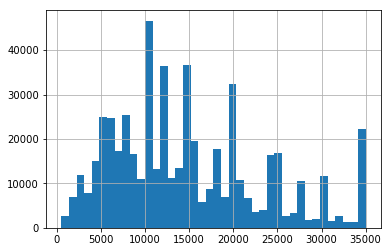

In [14]:
data.loan_amnt.hist(bins=40)

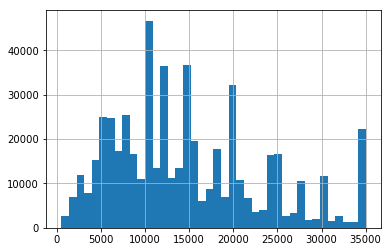

In [15]:
data.funded_amnt.hist(bins=40)

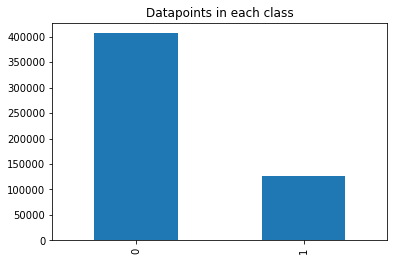

In [16]:
data.loan_status.value_counts().plot(kind="bar", title="Datapoints in each class");

## Split Training Set and Model Building with Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
split = int(len(data)*0.8)

# four most important features, performance score = 0.8685
major = ['tot_cur_bal', 'last_week_pay', 'total_rev_hi_lim', 'int_rate']

# not so important features, performance score = 0.7634
minor = ['tot_cur_bal','zip_code', 'addr_state', 'revol_util', 'revol_bal', 'sub_grade', 'annual_inc', 'total_rec_int']

data = data.dropna()
X_train = data[data['loan_status'] >= 0].iloc[:split,:-1][major]
Y_train = data[data['loan_status'] >= 0].iloc[:split,-1:]
X_test = data[data['loan_status'] >= 0].iloc[split:,:-1][major]
Y_test = data[data['loan_status'] >= 0].iloc[split:,-1:]

In [19]:
# load model from pretrained model
#rf = joblib.load('rf01.pkl') 

In [20]:
rf = RandomForestClassifier(n_estimators=100, verbose=5, n_jobs=-1)
rf.fit(X_train, Y_train)

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


building tree 2 of 100building tree 1 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.3s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100

building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.6s


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=5, warm_start=False)

In [21]:
# save model
#from sklearn.externals import joblib
#joblib.dump(rf, 'rf01.pkl') 

In [22]:
preds = rf.predict(X_test)
fpr1, tpr1, thr1 = roc_curve(Y_test['loan_status'], preds)
auc1 = roc_auc_score(Y_test['loan_status'], preds)

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.3s finished


In [23]:
print(auc1)
rf.score(X_test, Y_test)

0.774664968134


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.5s finished


0.86788873654752741

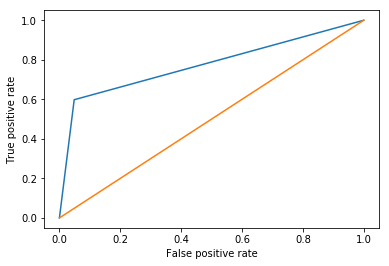

In [24]:
plt.plot(fpr1,tpr1)
plt.plot(fpr1,fpr1)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [25]:
fi = list(zip(X_train.columns.values, rf.feature_importances_))
fi = sorted(fi, key=lambda x: -x[1])
pd.DataFrame(fi, columns=["Feature","Importance"])

,Feature,Importance
0,tot_cur_bal,0.303800
1,int_rate,0.269341
2,total_rev_hi_lim,0.243646
3,last_week_pay,0.183213


## Prediction

In [ ]:
data_test = pd.read_csv("input/test_indessa.csv")
rows = data_test['member_id'].copy()

In [ ]:
print("Shape: ", data_test.shape)
data_test[:5]

In [ ]:
data_test = data_test.fillna("0")

In [ ]:
data_test['last_week_pay'] = data_test['last_week_pay'].str.extract('(\d+)', expand=False).astype(float)

In [ ]:
data_test.drop(drop_cols, 1, inplace=True)

In [ ]:
for col in cat_cols:
    data_test[col] = le[col].transform(data_test[col])
    print(col)

In [ ]:
data_test = data_test.fillna(0)

In [ ]:
pred_test = rf.predict_proba(data_test)

In [ ]:
pred_frame = pd.DataFrame({'member_id': rows, 'loan_status': pred_test[:,1]})

In [ ]:
pred_frame.to_csv('submission.csv', index=False, columns=['member_id', 'loan_status'], float_format='%g')

## Try Other Models

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knc = KNeighborsClassifier(n_neighbors=150, n_jobs=-1)
knc.fit(X_train, Y_train)

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=150, p=2,
           weights='uniform')

In [28]:
preds_knc = knc.predict(X_test)

In [29]:
knc.score(X_test, Y_test)

0.81170294686625477

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
sgd = SGDClassifier(loss='modified_huber', verbose=2, n_jobs=-1, n_iter=300)
sgd.fit(X_train, Y_train)

/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 23221.28, NNZs: 4, Bias: -1938.808532, T: 425942, Avg. loss: 14559322255.359161
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 15537.68, NNZs: 4, Bias: -2230.997555, T: 851884, Avg. loss: 8139895607.772470
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 15197.10, NNZs: 4, Bias: -2401.987756, T: 1277826, Avg. loss: 5770049219.810980
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 13538.97, NNZs: 4, Bias: -2528.962171, T: 1703768, Avg. loss: 4509774190.363975
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 13456.26, NNZs: 4, Bias: -2626.157668, T: 2129710, Avg. loss: 3721474648.293391
Total training time: 0.41 seconds.
-- Epoch 6
Norm: 12710.75, NNZs: 4, Bias: -2710.102364, T: 2555652, Avg. loss: 3178501999.796047
Total training time: 0.49 seconds.
-- Epoch 7
Norm: 13619.74, NNZs: 4, Bias: -2781.501696, T: 2981594, Avg. loss: 2778750947.698851
Total training time: 0.57 seconds.
-- Epoch 8
Norm: 12110.37, NNZs: 4, Bias: -2844.676949, T: 3407536, Avg. loss

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=300,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=2, warm_start=False)

In [32]:
sgd.score(X_test, Y_test)

0.3543564412223203